In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", size=20)
import daft
%matplotlib inline

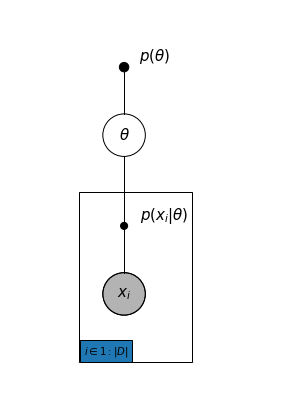

In [10]:
pgm = daft.PGM(shape=[2.5, 3.5], origin=[0, 0], grid_unit=4,
               label_params={'fontsize':15}, observed_style='shaded')

# add nodes
pgm.add_node(daft.Node("theta_prior", r"$p(\theta)$", 1, 3, scale=2,
                       fixed=True, offset=(30,0)))

pgm.add_node(daft.Node("theta", r"$\theta$", 1, 2.40, scale=1.5))

pgm.add_node(daft.Node("x_prior", r"$p(x_i|\theta)$", 1, 1.6, scale=1.5, fixed=True, offset=(40, 0)))

pgm.add_node(daft.Node("x", r"$x_i$", 1, 1, scale=1.5, observed=True))

pgm.add_plate(daft.Plate([0.6, 0.4, 1, 1.5], label=r"$i \in 1: |D|$", label_offset=(5, 8)))

## add edges
pgm.add_edge("theta_prior", "theta", directed=False)
pgm.add_edge("theta", "x_prior", directed=False)
pgm.add_edge("x_prior", "x", directed=False)

pgm.render();
plt.savefig("media/clutter_problem_factor_graph", dpi=75)